In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import libraries for visualization of data
import matplotlib.pyplot as plt

#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline

In [6]:
#paths to the train, validation and test image datasets 
train_path = './data/Garbage_classification'
valid_path = './data/Garbage_classification'


# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['besi', 'kaca', 'kardus', 
                                                         'kertas', 'organik', 'plastik'], batch_size=16, subset='training')


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['besi', 'kaca', 'kardus', 
                                                         'kertas', 'organik', 'plastik'], batch_size=16, subset='validation')

Found 2692 images belonging to 6 classes.
Found 298 images belonging to 6 classes.


In [7]:
# plot images after applying VGG16 data preprocessing method
def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

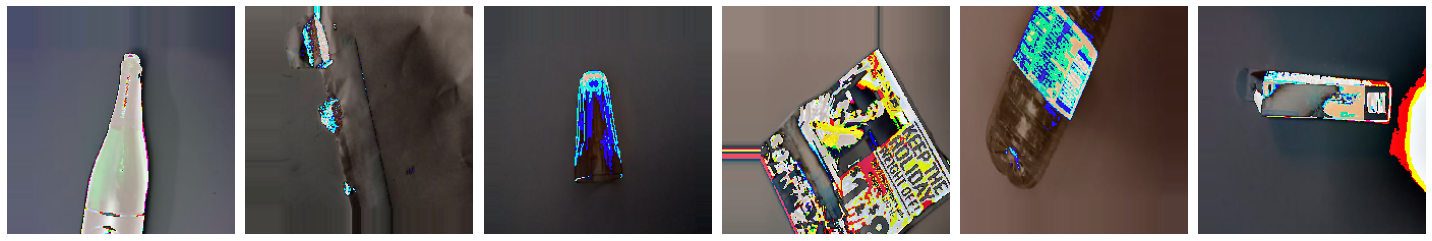

In [8]:
imgs, labels = next(train_batches)
plotImages(imgs)

In [9]:
# set the input image size for proposed CNN model
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# import the convolution base of the VGG16 model with pre-trained weights
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')

In [10]:
# summary of convolution base of VGG16 model
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# Initialize a sequential model to group a linear stack of layers
model = Sequential()

# Freeze the convolutional base of VGG16 to prevent the pre-trained weights being updated 
# during training inorder to extract features
base_model.trainable=False

# add VGG16 convolution base to initialize sequential model
model.add(base_model)

# add global average pooling layer
model.add(GlobalAveragePooling2D())

# add densely-connected NN layer with 512 hidden units
model.add(Dense(units=512, activation='relu'))  # use ReLU activation function
model.add(BatchNormalization())                 # normalize and scale inputs or activations
model.add(Dropout(0.2))                         # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 128 hidden units
model.add(Dense(units=128, activation='relu')) # use ReLU activation function
model.add(BatchNormalization())                # normalize and scale inputs or activations
model.add(Dropout(0.2))                        # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 6 hidden units
model.add(Dense(units=6, activation='softmax')) # use Softmax activation function to do final predictions

In [12]:
# summary of proposed CNN model(architecture)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               6

In [13]:
# compile the built CNN model by selecting suitable optimizer and loss function
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# train the model with appropriate number of epochs
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=18, verbose=2)

Epoch 1/18
169/169 - 80s - loss: 1.3100 - accuracy: 0.5078 - val_loss: 0.6368 - val_accuracy: 0.7584 - 80s/epoch - 475ms/step
Epoch 2/18
169/169 - 48s - loss: 0.7316 - accuracy: 0.7299 - val_loss: 0.4554 - val_accuracy: 0.8221 - 48s/epoch - 284ms/step
Epoch 3/18
169/169 - 48s - loss: 0.6128 - accuracy: 0.7823 - val_loss: 0.3845 - val_accuracy: 0.8456 - 48s/epoch - 282ms/step
Epoch 4/18
169/169 - 73s - loss: 0.5365 - accuracy: 0.8024 - val_loss: 0.3417 - val_accuracy: 0.8691 - 73s/epoch - 432ms/step
Epoch 5/18
169/169 - 73s - loss: 0.4629 - accuracy: 0.8336 - val_loss: 0.3199 - val_accuracy: 0.8859 - 73s/epoch - 433ms/step
Epoch 6/18
169/169 - 73s - loss: 0.4274 - accuracy: 0.8510 - val_loss: 0.3178 - val_accuracy: 0.8926 - 73s/epoch - 434ms/step
Epoch 7/18
169/169 - 74s - loss: 0.3948 - accuracy: 0.8622 - val_loss: 0.2920 - val_accuracy: 0.9060 - 74s/epoch - 436ms/step
Epoch 8/18
169/169 - 50s - loss: 0.3704 - accuracy: 0.8633 - val_loss: 0.2817 - val_accuracy: 0.9060 - 50s/epoch - 294

In [15]:
# store the losses of training
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [16]:
# store the accuracy of training
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [17]:
# unfreeze the convolution base of VGG16 inorder to fine-tune which adapt these pre-trained weights 
# to work with the new dataset
base_model.trainable=True

In [18]:
# summary of the fine-tune CNN model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               6

In [19]:
# train and fine-tune the model with appropriate number of epochs
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=4, verbose=2)

Epoch 1/4
169/169 - 75s - loss: 0.1989 - accuracy: 0.9346 - val_loss: 0.2429 - val_accuracy: 0.9195 - 75s/epoch - 442ms/step
Epoch 2/4
169/169 - 74s - loss: 0.1979 - accuracy: 0.9302 - val_loss: 0.2435 - val_accuracy: 0.9228 - 74s/epoch - 440ms/step
Epoch 3/4
169/169 - 74s - loss: 0.1955 - accuracy: 0.9372 - val_loss: 0.2362 - val_accuracy: 0.9128 - 74s/epoch - 440ms/step
Epoch 4/4
169/169 - 74s - loss: 0.1948 - accuracy: 0.9276 - val_loss: 0.2479 - val_accuracy: 0.8960 - 74s/epoch - 438ms/step


In [20]:
# append the losses to previous stored losses
loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])

In [21]:
# append the accuracy to previous stored accuracy
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

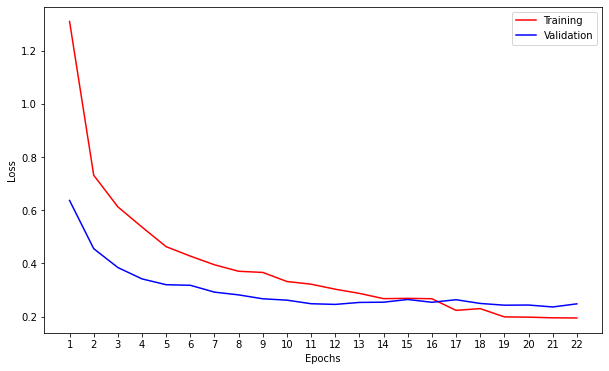

In [22]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

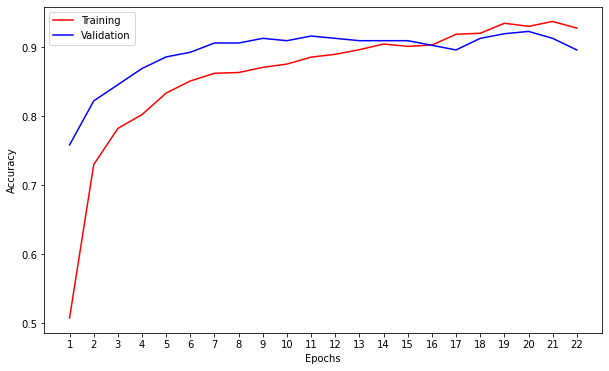

In [23]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

In [24]:
model.save('model.h5')